In [29]:
import numpy as np
import pickle
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [43]:
pmt_info = pickle.load(open('/home/jpyanez/snoplus/snoplus_python/pmt_positions.pckl'))
pmt_radii = np.linalg.norm(pmt_info['xyz'], axis=1)
costheta = pmt_info['xyz'][:,2]/pmt_radii
phi      = np.arctan2(pmt_info['xyz'][:,1], 
                      pmt_info['xyz'][:,0])

In [52]:
effective_n = 1.4
ch_angle = np.arccos(1/effective_n)

# This c is the opening parameter of the Cherenkov cone
c  = np.tan(ch_angle/2.)
print np.rad2deg(ch_angle), c

0.408248290464
44.4153085972 0.408248290464


In [79]:
# Lets get the coordinates of the event

In [398]:
direction = np.array([0., 4., 4])
normdir   = direction/np.linalg.norm(direction)
position  = np.array([0., 5000., 0.])
print 'Direction', normdir

Direction [ 0.          0.70710678  0.70710678]


In [399]:
# What's the required rotation in theta
# of the whole system so that this would
# point upwards

In [400]:
# Defining the rotation angles
N = np.cross(np.array([0,0,1]), normdir)
alpha = np.arccos(np.dot(np.array([1,0,0]),N))
beta  = np.arccos(np.dot(np.array([0,0,1]), normdir))
gamma = 0.
print np.rad2deg(alpha), np.rad2deg(beta)

B = np.array([[1, 0,0],
              [0, np.cos(gamma), np.sin(gamma)],
              [0, -np.sin(gamma), np.cos(gamma)]])

C = np.array([[np.cos(beta), 0, np.sin(beta)],
              [0,1,0],
              [-np.sin(beta), 0, np.cos(beta)]])

D = np.array([[np.cos(alpha), np.sin(alpha), 0],
              [-np.sin(alpha), np.cos(alpha), 0],
              [0,0,1.]])
R = np.dot(B,np.dot(C,D))
print 'Rotation matrix\n', R

135.0 45.0
Rotation matrix
[[-0.5         0.5         0.70710678]
 [-0.70710678 -0.70710678  0.        ]
 [ 0.5        -0.5         0.70710678]]


In [401]:
# Now I need to rotate the vertex
rotpos = np.dot(R, position)
print 'Rotated position\n', rotpos

Rotated position
[ 2500.         -3535.53390593 -2500.        ]


In [402]:
# And all PMTs
rotpmts = np.zeros_like(pmt_info['xyz'])
for i in range(rotpmts.shape[0]):
    rotpmts[i,:] = np.dot(R,pmt_info['xyz'][i,:])

In [403]:
class ConeZ2(object):
    def __init__(self,
                 event_vertex = None):
        self.x0 = event_vertex[0]
        self.y0 = event_vertex[1]
        self.z0 = event_vertex[2]
        
    def __call__(self, x,y):
        z2 = ((x-self.x0)**2 + (y-self.y0)**2)/c**2
        return np.sqrt(z2)+self.z0, -np.sqrt(z2)+self.z0
    



In [404]:
cone_sphere = ConeZ2(event_vertex = rotpos)

In [405]:
z1, z2 = cone_sphere(rotpmts[:,0], rotpmts[:,1])

In [406]:
diff_pos = np.abs(rotpmts[:,2] - z1)
diff_neg = np.abs(rotpmts[:,2] - z2)
tolerance = 300.
pos_pmts = (diff_pos<tolerance)
neg_pmts = (diff_neg<tolerance)
pmts_cone = pos_pmts*neg_pmts



print "PMTS in range", np.sum(pmts_cone)

PMTS in range 98


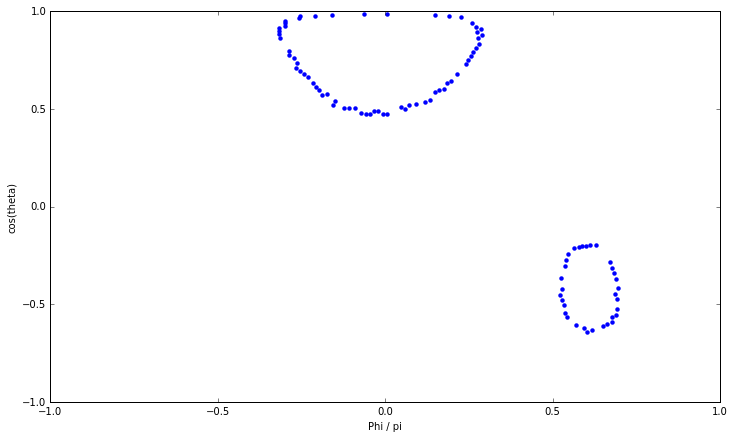

In [407]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
plt.scatter(phi[pmts_cone]/np.pi, costheta[pmts_cone],
            marker='o',lw = 0)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('Phi / pi')
plt.ylabel('cos(theta)')
plt.show()

In [ ]:

class ConeZ2(x,y):
    # This returns (z-z0)**2
    z2 = ((x-x0)**2 + (y-y0)**2)/c**2
    return np.sqrt(z2)+z0, -np.sqrt(z2)+z0

In [ ]:
z1, z2 = ConeZ2(pmt_info['xyz'][:,0], pmt_info['xyz'][:,1])
diff_pos = np.abs(pmt_info['xyz'][:,2] - z1)
diff_neg = np.abs(pmt_info['xyz'][:,2] - z2)

tolerance = 300.
pmts_cone = (diff_pos<tolerance)+(diff_neg<tolerance)

In [ ]:
# Need to rotate the p0 position as well as all the PMT positions to do the calculation.
# select pmts_cone and then plot those

In [68]:
x0 = position[0]
y0 = position[1]
z0 = position[2]

In [259]:
# Rotation matrix
beta = np.arccos(normdir[2])
print np.rad2deg(beta)
R = np.array([[np.cos(beta), 0, np.sin(beta)],
              [0,1,0],
              [-np.sin(beta), 0, np.cos(beta)]])
print 'Rotation matrix\n', R

82.35859494
Rotation matrix
[[ 0.13297266  0.          0.99111971]
 [ 0.          1.          0.        ]
 [-0.99111971  0.          0.13297266]]


In [76]:
z1, z2 = ConeZ2(pmt_info['xyz'][:,0], pmt_info['xyz'][:,1])
diff_pos = np.abs(pmt_info['xyz'][:,2] - z1)
diff_neg = np.abs(pmt_info['xyz'][:,2] - z2)

tolerance = 300.
pmts_cone = (diff_pos<tolerance)+(diff_neg<tolerance)

In [77]:
np.sum(pmts_cone)

98